In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np
import statsmodels as sm
from statsmodels.stats.anova import AnovaRM
import pingouin as pg

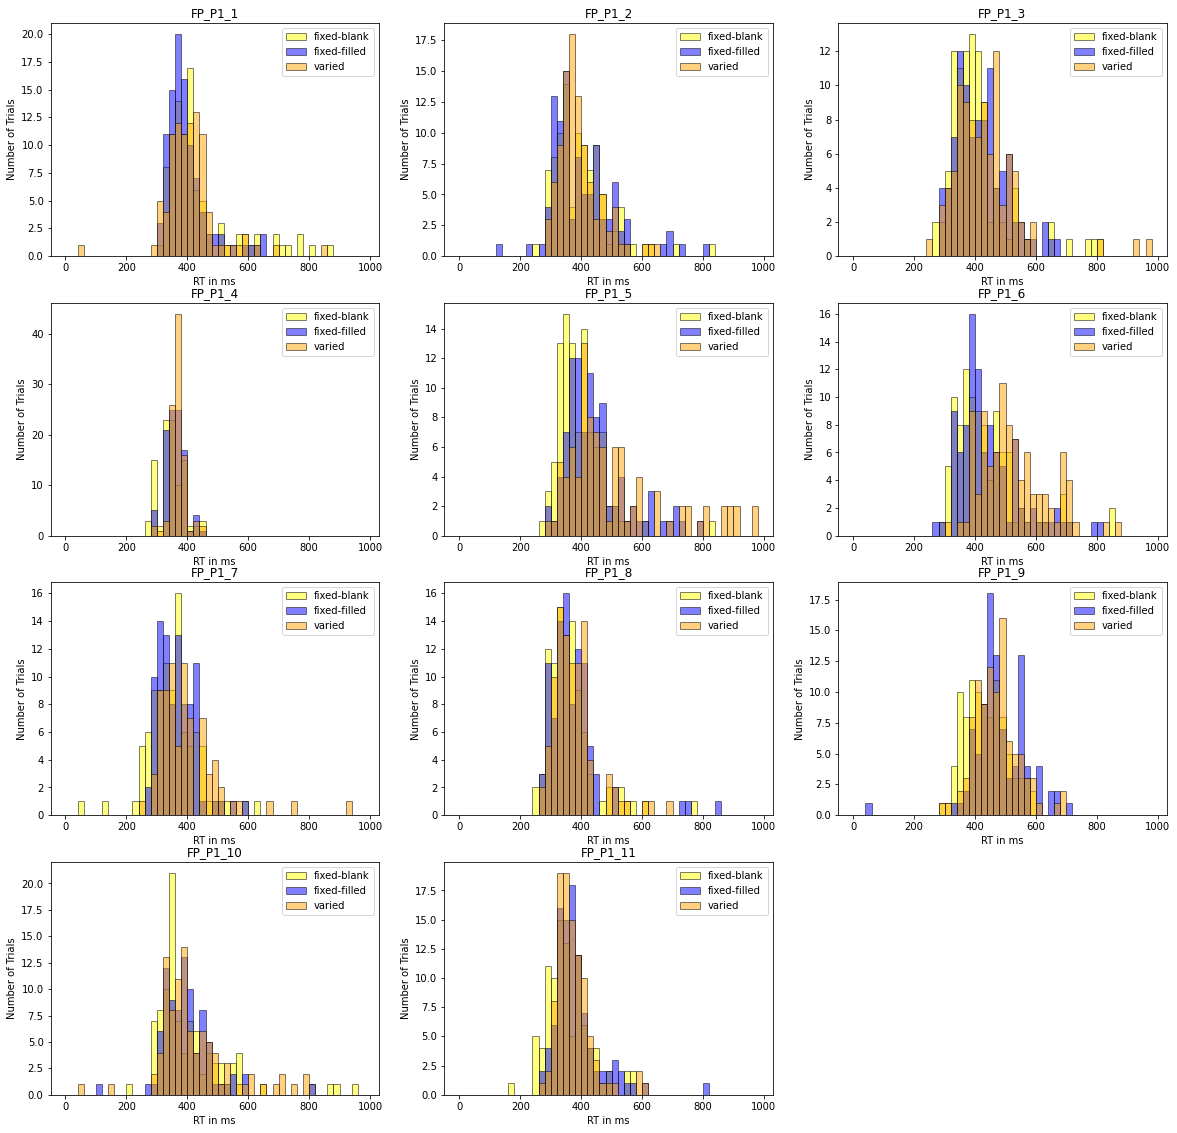

In [9]:
path = "csv_files/"
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
    
block = []
i=0    
while i < 1000:
    block.append(i)
    i+=20
    

n=1
plt.figure(figsize = (20,30))
for df in li:
    fb = df[(df['block'] == 'fixed-blank') & (df['rt'] >= 0) & (df['correct'] == True)]
    ff = df[(df['block'] == 'fixed-filled') & (df['rt'] >= 0) & (df['correct'] == True)]
    v = df[(df['block'] == 'varied') & (df['rt'] >= 0) & (df['correct'] == True)]
    
    plt.subplot(6,3,n)
    plt.hist(fb.rt, bins=block, alpha=0.5, edgecolor="black", color="yellow", label="fixed-blank")
    plt.hist(ff.rt, bins=block, alpha=0.5, edgecolor="black", color="blue", label="fixed-filled")
    plt.hist(v.rt, bins=block, alpha=0.5, edgecolor="black", color="orange", label="varied")
    plt.legend(loc='upper right')
    plt.title("FP_P1_" + str(n))
    plt.xlabel("RT in ms")
    plt.ylabel("Number of Trials")
    n+=1
plt.show()

<AxesSubplot:xlabel='Block Type', ylabel='Mean RT in ms'>

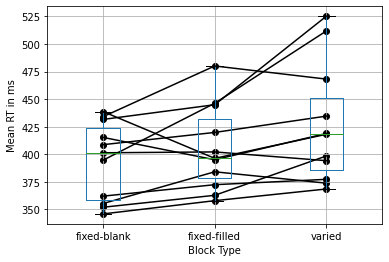

In [10]:
# clear out lists while troubleshooting
bpmns = []
fig, ax=plt.subplots()
plt.xlabel("Block Type")
plt.ylabel("Mean RT in ms")
for df in li:
    dfmns = []
    fb = df[(df['block'] == 'fixed-blank') & (df['rt'] >= 0) & (df['correct'] == True)]
    dfmns.append(fb.rt.mean())
    ff = df[(df['block'] == 'fixed-filled') & (df['rt'] >= 0) & (df['correct'] == True)]
    dfmns.append(ff.rt.mean())
    v = df[(df['block'] == 'varied') & (df['rt'] >= 0) & (df['correct'] == True)]
    dfmns.append(v.rt.mean())
    bpmns.append(dfmns)
    lst = [fb.rt.mean(), ff.rt.mean(), v.rt.mean()]
    lts = ['fixed-blank', 'fixed-filled', 'varied']
    ax.scatter(lts, lst, color='black')
    ax.plot(lts,lst, color="black")
    # [fbmn, ffmn, vmn]
FP_df = pd.DataFrame(np.array(bpmns), columns=['fixed-blank', 'fixed-filled', 'varied'])
FP_df.boxplot(positions=range(len(FP_df.columns)))

In [75]:
i=0
anov = []
for df in li:
    fb = df[(df['block'] == 'fixed-blank') & (df['rt'] >= 0) & (df['correct'] == True)]
    anov.append([i, 1, fb.rt.mean()])
    ff = df[(df['block'] == 'fixed-filled') & (df['rt'] >= 0) & (df['correct'] == True)]
    anov.append([i, 2, ff.rt.mean()])
    v = df[(df['block'] == 'varied') & (df['rt'] >= 0) & (df['correct'] == True)]
    anov.append([i, 3, v.rt.mean()])
    i+=1
ANOVA_df = pd.DataFrame(np.array(anov), columns=['SUB_ID', 'BLOCK_TYPE', 'MEAN_RT'])

In [80]:
anovRM = AnovaRM(ANOVA_df, depvar='MEAN_RT', subject='SUB_ID', within=['BLOCK_TYPE'])
print(anovRM.fit())

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
BLOCK_TYPE  5.1765 2.0000 20.0000 0.0154



<AxesSubplot:xlabel='Block Type', ylabel='Percent Correct Trials'>

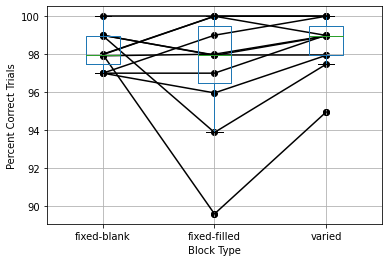

In [11]:
bppct = []
fig, ax=plt.subplots()
plt.xlabel("Block Type")
plt.ylabel("Percent Correct Trials")
for df in li:
    dfpct = []
    fbc = df[(df['block'] == 'fixed-blank') & (df['rt'] >= 0) & (df['correct'] == True)]
    fbf = df[(df['block'] == 'fixed-blank') & (df['rt'] >= 0) & (df['correct'] == False)]
    sm = fbc.rt.count()+fbf.rt.count()
    fbpct = fbc.rt.count()/sm*100
    dfpct.append(fbpct)
    ffc = df[(df['block'] == 'fixed-filled') & (df['rt'] >= 0) & (df['correct'] == True)]
    fff = df[(df['block'] == 'fixed-filled') & (df['rt'] >= 0) & (df['correct'] == False)]
    sm = ffc.rt.count()+fff.rt.count()
    ffpct = ffc.rt.count()/sm*100
    dfpct.append(ffpct)
    vc = df[(df['block'] == 'varied') & (df['rt'] >= 0) & (df['correct'] == True)]
    vf = df[(df['block'] == 'varied') & (df['rt'] >= 0) & (df['correct'] == False)]
    sm = vc.rt.count()+vf.rt.count()
    vpct = vc.rt.count()/sm*100
    dfpct.append(vpct)
    bppct.append(dfpct)
    lst = [fbpct, ffpct, vpct]
    lts = ['fixed-blank', 'fixed-filled', 'varied']
    ax.scatter(lts, lst, color='black')
    ax.plot(lts,lst, color="black")
    # [fbmn, ffmn, vmn]
FP_df = pd.DataFrame(np.array(bppct), columns=['fixed-blank', 'fixed-filled', 'varied'])
FP_df.boxplot(positions=range(len(FP_df.columns)))

<AxesSubplot:xlabel='Block Type', ylabel='Mean RT in ms'>

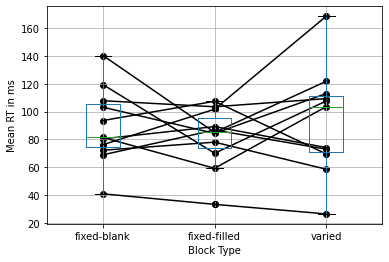

In [12]:
# clear out lists while troubleshooting
bpstds = []
fig, ax=plt.subplots()
plt.xlabel("Block Type")
plt.ylabel("Mean RT in ms")
for df in li:
    dfstds = []
    fb = df[(df['block'] == 'fixed-blank') & (df['rt'] >= 0) & (df['correct'] == True)]
    dfstds.append(fb.rt.std())
    ff = df[(df['block'] == 'fixed-filled') & (df['rt'] >= 0) & (df['correct'] == True)]
    dfstds.append(ff.rt.std())
    v = df[(df['block'] == 'varied') & (df['rt'] >= 0) & (df['correct'] == True)]
    dfstds.append(v.rt.std())
    bpstds.append(dfstds)
    lst = [fb.rt.std(), ff.rt.std(), v.rt.std()]
    lts = ['fixed-blank', 'fixed-filled', 'varied']
    ax.scatter(lts, lst, color='black')
    ax.plot(lts,lst, color="black")
    # [fbmn, ffmn, vmn]
FP_df = pd.DataFrame(np.array(bpstds), columns=['fixed-blank', 'fixed-filled', 'varied'])
FP_df.boxplot(positions=range(len(FP_df.columns)))